In [43]:
!pip install --user pycaret[full]
!pip install --user xgboost

  Using cached fugue-0.7.2-py3-none-any.whl (312 kB)
  Using cached uvicorn-0.18.3-py3-none-any.whl (57 kB)
  Using cached shap-0.41.0-cp38-cp38-win_amd64.whl (435 kB)
  Using cached evidently-0.1.57.dev0-py3-none-any.whl (11.9 MB)
  Using cached fastapi-0.85.0-py3-none-any.whl (55 kB)
  Using cached google_cloud_storage-2.5.0-py2.py3-none-any.whl (106 kB)
  Using cached explainerdashboard-0.4.0-py3-none-any.whl (279 kB)
  Using cached azure_storage_blob-12.13.1-py3-none-any.whl (377 kB)
  Using cached ray-2.0.0-cp38-cp38-win_amd64.whl (20.7 MB)
  Using cached boto3-1.24.79-py3-none-any.whl (132 kB)
  Using cached interpret-0.2.4-py3-none-any.whl (1.4 kB)
  Using cached hyperopt-0.2.7-py2.py3-none-any.whl (1.6 MB)
  Using cached fairlearn-0.7.0-py3-none-any.whl (177 kB)
  Using cached scikit_optimize-0.9.0-py2.py3-none-any.whl (100 kB)
  Using cached m2cgen-0.10.0-py3-none-any.whl (92 kB)
  Using cached autoviz-0.1.55-py3-none-any.whl (64 kB)
  Using cached optuna-3.0.2-py3-none-any.wh

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress t

In [49]:
!pip install --user ray

In [2]:
from platform import python_version
print(python_version())

3.8.13


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
from pycaret.classification import *
from xgboost import *

In [23]:
TrainDS = pd.read_csv('training-stroke.csv')
TrainDS.drop('id', axis=1, inplace=True)
TestDS = pd.read_csv('testing-stroke.csv')

In [4]:
TrainDS.describe()

,Age,BodyMassIndex,Hypertension,Had_Heart_Disease,Mean_Glucose_Level,Stroke
count,4088.000000,3928.000000,4088.000000,4088.000000,4088.000000,4088.000000
mean,43.382642,28.896207,0.096624,0.054550,106.016849,0.048679
std,22.505514,7.826705,0.295482,0.227127,44.771715,0.215223
min,0.080000,10.300000,0.000000,0.000000,55.220000,0.000000
25%,25.000000,23.500000,0.000000,0.000000,77.520000,0.000000
50%,45.000000,28.100000,0.000000,0.000000,92.145000,0.000000
75%,61.000000,33.100000,0.000000,0.000000,114.012500,0.000000
max,82.000000,97.600000,1.000000,1.000000,271.740000,1.000000


In [5]:
s = setup(TrainDS, target = 'Stroke')

,Description,Value
0,session_id,3283
1,Target,Stroke
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(4088, 11)"
5,Missing Values,True
6,Numeric Features,3
7,Categorical Features,7
8,Ordinal Features,False
9,High Cardinality Features,False


In [64]:
best = compare_models(sort = 'AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9451,0.8346,0.0067,0.1000,0.0125,0.0119,0.0252,0.5360
lda,Linear Discriminant Analysis,0.9423,0.8310,0.0708,0.2883,0.1121,0.0982,0.1239,0.0070
gbc,Gradient Boosting Classifier,0.9406,0.8211,0.0254,0.1333,0.0422,0.0310,0.0419,0.0810
ada,Ada Boost Classifier,0.9441,0.8098,0.0446,0.2917,0.0714,0.0636,0.0944,0.0500
lightgbm,Light Gradient Boosting Machine,0.9343,0.8043,0.0379,0.1617,0.0611,0.0388,0.0513,0.0280
catboost,CatBoost Classifier,0.9423,0.8013,0.0192,0.2500,0.0354,0.0275,0.0563,0.7580
nb,Naive Bayes,0.4037,0.7910,0.9675,0.0836,0.1537,0.0579,0.1627,0.0050
rf,Random Forest Classifier,0.9430,0.7883,0.0062,0.0500,0.0111,0.0067,0.0099,0.0900
xgboost,Extreme Gradient Boosting,0.9301,0.7855,0.0379,0.1460,0.0593,0.0324,0.0432,0.1180
et,Extra Trees Classifier,0.9353,0.7523,0.0254,0.1033,0.0395,0.0205,0.0254,0.1010


# Logistic Regression has the best ROC AUC

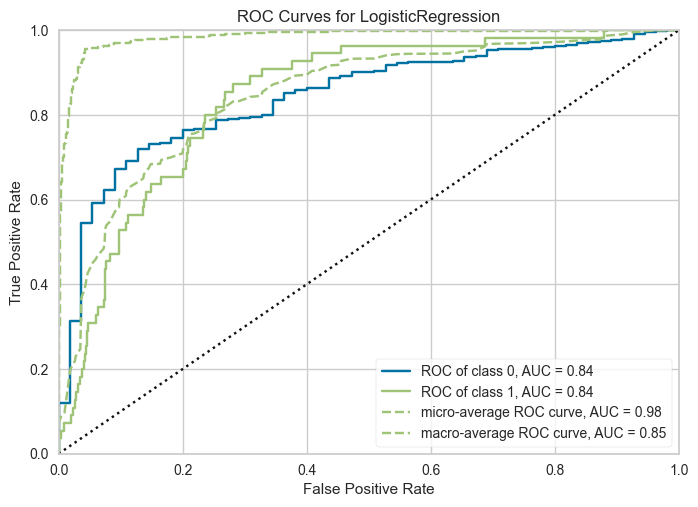

In [18]:
plot_model(best, plot = 'auc')

In [21]:
lr = create_model('lr')
print(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9477,0.8350,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9510,0.8480,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9510,0.8246,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9510,0.8587,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9510,0.8511,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9510,0.8414,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9510,0.7828,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9476,0.8367,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9476,0.8271,0.0000,0.0000,0.0000,0.0000,0.0000


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1951, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [26]:
tuned_lr = tune_model(lr, n_iter=20, optimize='AUC', choose_better=True)
print(tuned_lr)
# C value changed other parameters are the same

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9477,0.8382,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9510,0.8485,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9510,0.8246,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9510,0.8595,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9510,0.8516,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9510,0.8414,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9510,0.7826,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9476,0.8364,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9476,0.8273,0.0000,0.0000,0.0000,0.0000,0.0000


LogisticRegression(C=0.602, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1951, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [61]:
lr = create_model('lr')
tuned_lr = tune_model(lr, n_iter=50, optimize='AUC', choose_better=True)
predictions = predict_model(tuned_lr, data=TestDS, raw_score=True)
predictions = predictions.rename(columns = {'Score_1':'Stroke'})
predictions[['id','Stroke']].to_csv('lr.csv', index=False)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9443,0.8704,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9510,0.7442,0.0667,1.0000,0.1250,0.1192,0.2518
2,0.9476,0.7963,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9441,0.8104,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9441,0.8438,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9441,0.8762,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9441,0.8722,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9441,0.8822,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9441,0.8023,0.0000,0.0000,0.0000,0.0000,0.0000


## Let's try using the xgboost (extreme gradient boosting) model

In [24]:
xgb = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9477,0.8711,0.1250,0.6667,0.2105,0.1964,0.2737
1,0.9301,0.7594,0.0000,0.0000,0.0000,-0.0269,-0.0314
2,0.9406,0.7801,0.0667,0.2500,0.1053,0.0851,0.1055
3,0.9091,0.7222,0.0000,0.0000,0.0000,-0.0450,-0.0463
4,0.9406,0.7451,0.1250,0.4000,0.1905,0.1683,0.1997
5,0.9266,0.8220,0.0625,0.1429,0.0870,0.0548,0.0599
6,0.9266,0.8222,0.0000,0.0000,0.0000,-0.0274,-0.0325
7,0.9301,0.8238,0.0000,0.0000,0.0000,-0.0229,-0.0290
8,0.9301,0.7213,0.0000,0.0000,0.0000,-0.0229,-0.0290


In [51]:
tuned_xgb = tune_model(xgb, n_iter=20, optimize='AUC', choose_better=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8397,0.9013,0.6875,0.2115,0.3235,0.2605,0.3194
1,0.8077,0.7402,0.4667,0.1296,0.2029,0.1316,0.1670
2,0.7972,0.7742,0.4000,0.1091,0.1714,0.0970,0.1240
3,0.7517,0.8072,0.6250,0.1333,0.2198,0.1405,0.2008
4,0.7937,0.8257,0.5000,0.1356,0.2133,0.1374,0.1767
5,0.8217,0.8604,0.6875,0.1930,0.3014,0.2345,0.2975
6,0.8147,0.8713,0.8125,0.2063,0.3291,0.2634,0.3479
7,0.8322,0.8725,0.6875,0.2037,0.3143,0.2495,0.3102
8,0.8077,0.7810,0.3750,0.1176,0.1791,0.1027,0.1251


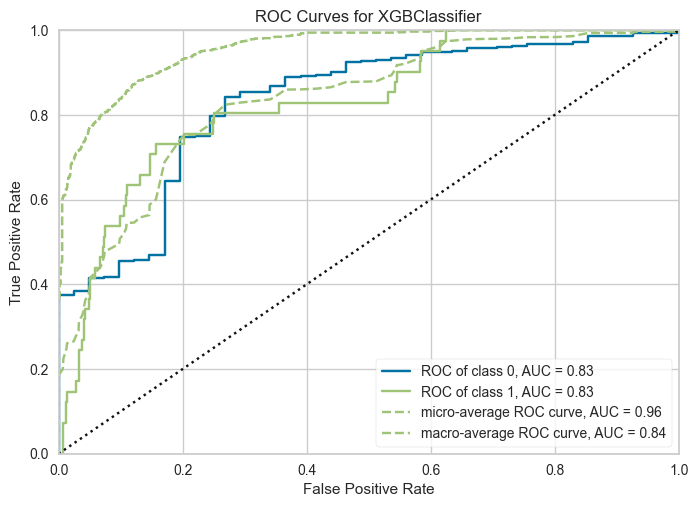

In [52]:
plot_model(tuned_xgb)

In [55]:
dashboard(tuned_xgb)
# Possibility to use pycaret tu have a dashboard window

Detected XGBClassifier model: Changing class type to XGBClassifierExplainer...
Note: model_output=='probability'. For XGBClassifier shap values normally get calculated against X_background, but paramater X_background=None, so using X instead
Generating self.shap_explainer = shap.TreeExplainer(model, X, model_output='probability', feature_perturbation='interventional')...
Note: Shap interaction values will not be available. If shap values in probability space are not necessary you can pass model_output='logodds' to get shap values in logodds without the need for a background dataset and also working shap interaction values...
Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is running...
For this type of model and model_output interactions don't work, so setting shap_interaction=False...
Generating layout...
Calculating shap values...
Calculating predicti

 * Running on all addresses.
 * Running on http://10.0.250.170:8050/ (Press CTRL+C to quit)
10.0.250.170 - - [23/Sep/2022 16:19:44] "GET / HTTP/1.1" 200 -
10.0.250.170 - - [23/Sep/2022 16:19:44] "GET /assets/bootstrap.min.css?m=1663937319.5170038 HTTP/1.1" 304 -
10.0.250.170 - - [23/Sep/2022 16:19:45] "GET /_dash-dependencies HTTP/1.1" 200 -
10.0.250.170 - - [23/Sep/2022 16:19:45] "GET /_dash-layout HTTP/1.1" 200 -
10.0.250.170 - - [23/Sep/2022 16:19:45] "GET /_dash-component-suites/dash/dcc/async-dropdown.js HTTP/1.1" 200 -
10.0.250.170 - - [23/Sep/2022 16:19:45] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 200 -
10.0.250.170 - - [23/Sep/2022 16:19:45] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 200 -
10.0.250.170 - - [23/Sep/2022 16:19:45] "POST /_dash-update-component HTTP/1.1" 204 -
10.0.250.170 - - [23/Sep/2022 16:19:45] "POST /_dash-update-component HTTP/1.1" 200 -
10.0.250.170 - - [23/Sep/2022 16:19:45] "POST /_dash-update-component HTTP/1

In [32]:
print(tuned_xgb)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.0005, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=9, max_leaves=0, min_child_weight=2,
              missing=nan, monotone_constraints='()', n_estimators=80,
              n_jobs=-1, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=3283, reg_alpha=10, ...)


In [62]:
predictions = predict_model(tuned_xgb, data=TestDS, raw_score=True)
predictions = predictions.rename(columns = {'Score_1':'Stroke'})
predictions[['id','Stroke']].to_csv('xgboost.csv', index=False)

## The LDA model (Linear Discriminant Analysis) 

In [60]:
# Thanks to PyCaret, we are able to train, tune, and export predictions to a csv file (very) easily
lda = create_model('lda')
tuned_lda = tune_model(lda, n_iter=50, optimize='AUC', choose_better=True)
predictions = predict_model(tuned_lda, data=TestDS, raw_score=True)
predictions = predictions.rename(columns = {'Score_1':'Stroke'})
predictions[['id','Stroke']].to_csv('lda.csv', index=False)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9443,0.8642,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9510,0.7606,0.0667,1.0000,0.1250,0.1192,0.2518
2,0.9510,0.7855,0.0667,1.0000,0.1250,0.1192,0.2518
3,0.9441,0.8218,0.0625,0.5000,0.1111,0.0999,0.1622
4,0.9441,0.8322,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9406,0.8618,0.0000,0.0000,0.0000,-0.0066,-0.0144
6,0.9441,0.8796,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9441,0.8940,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9441,0.7986,0.0000,0.0000,0.0000,0.0000,0.0000


## GBC 

In [68]:
gbc = create_model('gbc')
tuned_gbc = tune_model(gbc, optimize='AUC', choose_better=True)
predictions = predict_model(tuned_gbc, data=TestDS, raw_score=True)
predictions = predictions.rename(columns = {'Score_1':'Stroke'})
predictions[['id','Stroke']].to_csv('gbc2.csv', index=False)
print(predictions)
#score of 0.5 - useless / Predictions of Stroke 0.0552 for every individual

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9443,0.8864,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9476,0.7536,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9476,0.7574,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9441,0.8251,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9441,0.8416,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9441,0.8655,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9441,0.8734,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9441,0.8803,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9441,0.7604,0.0000,0.0000,0.0000,0.0000,0.0000


                                    id   Age  Gender Married Employment_Type  \
0     07d9152e686ddb50c5330f7f9c1c58bc  79.0    Male     Yes         Private   
1     2f0bf07b716733d56ffa0b68cfe3823f  64.0  Female     Yes   Self-employed   
2     d63fbf8c3173730f82b150c5ef38b8ff  61.0  Female     Yes         Private   
3     d96988b88c76419fad9677dcd6adb947   3.0  Female      No        children   
4     142536b9b535b78e681c11b0195d962f   4.0    Male      No        children   
...                                ...   ...     ...     ...             ...   
1017  da6ea77475918a3d83c7e49223d453cc  28.0  Female      No         Private   
1018  8686fa633cfb5f49a0609122b9e4140b  46.0  Female     Yes         Private   
1019  b294fccdfe95bc7f7dd813216a821a76  32.0  Female     Yes         Private   
1020  4cabd4062d563c8027e488a337c34d28   5.0  Female      No        children   
1021  6917e6014aa45687457b8e6cf3713515  17.0  Female      No         Private   

     Urban_Rural        Smoker  BodyMas